# Pipeline Describe
- Download Data
- Load Data
- Analyze trend and cycle
- Transform for stationarity

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
# from pylab import rcParams
# import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller, arma_order_select_ic
import itertools
import warnings


#Own packages
import download
import descriptive
# import models
# import model_wrapper

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

## Download Data

In [20]:
# download.get_files(inpc=True, fiscal_current=True, fiscal_hist=True)

## Load Data

In [21]:
fiscal_income_df = download.load_fiscal_income()
fiscal_income_df = fiscal_income_df.asfreq(freq='MS')

## Describing Data

In [22]:
fiscal_income_df.columns

Index(['ingresos_sector_publico_neto_(mdp)', 'iva_neto_(mdp)',
       'ieps_neto_(mdp)', 'ingresos_no_tributarios_neto_(mdp)',
       'ingresos_gobierno_federal_neto_(mdp)',
       'ingresos_tributarios_neto_(mdp)', 'isr_neto_(mdp)', 'inpc_2018',
       'ingresos_sector_publico_neto_(mdp)_r', 'iva_neto_(mdp)_r',
       'ieps_neto_(mdp)_r', 'ingresos_no_tributarios_neto_(mdp)_r',
       'ingresos_gobierno_federal_neto_(mdp)_r',
       'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r'],
      dtype='object')

In [23]:
display(fiscal_income_df.columns)
display(fiscal_income_df.shape)
display(fiscal_income_df.isnull().any())
display(fiscal_income_df.head())
display(fiscal_income_df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

Index(['ingresos_sector_publico_neto_(mdp)', 'iva_neto_(mdp)',
       'ieps_neto_(mdp)', 'ingresos_no_tributarios_neto_(mdp)',
       'ingresos_gobierno_federal_neto_(mdp)',
       'ingresos_tributarios_neto_(mdp)', 'isr_neto_(mdp)', 'inpc_2018',
       'ingresos_sector_publico_neto_(mdp)_r', 'iva_neto_(mdp)_r',
       'ieps_neto_(mdp)_r', 'ingresos_no_tributarios_neto_(mdp)_r',
       'ingresos_gobierno_federal_neto_(mdp)_r',
       'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r'],
      dtype='object')

(352, 15)

ingresos_sector_publico_neto_(mdp)        False
iva_neto_(mdp)                            False
ieps_neto_(mdp)                           False
ingresos_no_tributarios_neto_(mdp)        False
ingresos_gobierno_federal_neto_(mdp)      False
ingresos_tributarios_neto_(mdp)           False
isr_neto_(mdp)                            False
inpc_2018                                 False
ingresos_sector_publico_neto_(mdp)_r      False
iva_neto_(mdp)_r                          False
ieps_neto_(mdp)_r                         False
ingresos_no_tributarios_neto_(mdp)_r      False
ingresos_gobierno_federal_neto_(mdp)_r    False
ingresos_tributarios_neto_(mdp)_r         False
isr_neto_(mdp)_r                          False
dtype: bool

,ingresos_sector_publico_neto_(mdp),iva_neto_(mdp),ieps_neto_(mdp),ingresos_no_tributarios_neto_(mdp),ingresos_gobierno_federal_neto_(mdp),ingresos_tributarios_neto_(mdp),isr_neto_(mdp),inpc_2018,ingresos_sector_publico_neto_(mdp)_r,iva_neto_(mdp)_r,ieps_neto_(mdp)_r,ingresos_no_tributarios_neto_(mdp)_r,ingresos_gobierno_federal_neto_(mdp)_r,ingresos_tributarios_neto_(mdp)_r,isr_neto_(mdp)_r
fecha,,,,,,,,,,,,,,,
1990-01-01,15527.708,2092.649,1040.445,7923.974,10861.811,7603.734,3897.608,7.776037,199686.644977,26911.509279,13380.144148,101902.468989,139683.113372,97784.175988,50123.319228
1990-02-01,12748.535,1796.237,887.693,7192.572,8522.032,5555.963,2299.732,7.952120,160316.182784,22588.153009,11162.973098,90448.485841,107166.795228,69867.696943,28919.735143
1990-03-01,14284.656,2005.865,800.115,8635.537,8296.806,5649.119,2082.503,8.092310,176521.365862,24787.298311,9887.349940,106712.880324,102527.042122,69808.485539,25734.345578
1990-04-01,14074.744,2032.419,860.166,7489.060,9702.308,6585.684,3020.333,8.215472,171319.977379,24738.920801,10470.074600,91158.005417,118098.004986,80161.971962,36763.963965
1990-05-01,14048.018,2060.314,801.122,8258.059,8834.236,5789.959,2311.738,8.358838,168061.859137,24648.331263,9584.131563,98794.345822,105687.373565,69267.513315,27656.213575


,ingresos_sector_publico_neto_(mdp),iva_neto_(mdp),ieps_neto_(mdp),ingresos_no_tributarios_neto_(mdp),ingresos_gobierno_federal_neto_(mdp),ingresos_tributarios_neto_(mdp),isr_neto_(mdp),inpc_2018,ingresos_sector_publico_neto_(mdp)_r,iva_neto_(mdp)_r,ieps_neto_(mdp)_r,ingresos_no_tributarios_neto_(mdp)_r,ingresos_gobierno_federal_neto_(mdp)_r,ingresos_tributarios_neto_(mdp)_r,isr_neto_(mdp)_r
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,178691.439147,28908.803784,6712.549968,93515.994462,129484.645680,85175.444710,44842.294945,54.510719,283666.718593,44197.228611,11670.799419,151740.499947,203044.717284,131926.218680,66954.896474
std,137825.704445,23164.948952,12215.370159,73426.901415,104122.125162,74267.992481,42370.611192,27.997773,102619.119351,19035.441364,14151.509793,64252.570136,81461.060774,57436.090420,36176.763326
min,12748.535000,1796.237000,-40485.066000,7192.572000,8296.806000,5555.963000,2082.503000,7.776037,149787.417013,16586.129701,-61322.528046,62650.951128,93776.559374,57239.531906,21065.773652
25%,56511.095500,7427.295000,1064.180500,30375.018250,38304.509250,23550.126000,10685.149500,30.906083,192201.604920,26311.379716,4537.520755,101737.238654,134434.354111,91945.581277,40437.809074
50%,148864.589500,23701.243000,3107.447085,84446.537000,107498.729500,63949.477500,29094.310500,57.062979,264424.828916,42419.467436,11675.108624,140863.603541,186246.426156,113727.125640,54269.572012
75%,284114.699750,44888.798612,9342.124000,145851.403550,203699.450025,110857.581500,65551.318535,77.857744,359539.366527,57471.790020,18802.166030,182030.971340,254971.779876,150297.971033,82830.774477
85%,327256.770435,56353.126597,15589.634648,167968.401140,246684.088785,171519.262550,89724.417936,86.835034,385144.536973,65890.008774,25381.354589,207307.107505,287714.244841,199787.339271,104484.248091
95%,425787.902600,74426.980305,32852.311435,194225.447650,315551.541575,246993.549360,129757.644630,97.146876,440036.806662,77590.946700,34871.139582,263999.162436,337338.220638,259309.626074,136804.844186
99%,514036.231670,83434.382496,38734.504564,331003.160186,388916.231332,288273.417547,173803.201991,103.048910,595036.296710,88611.366829,43048.383815,412275.741507,394722.484722,299058.341456,187785.445753


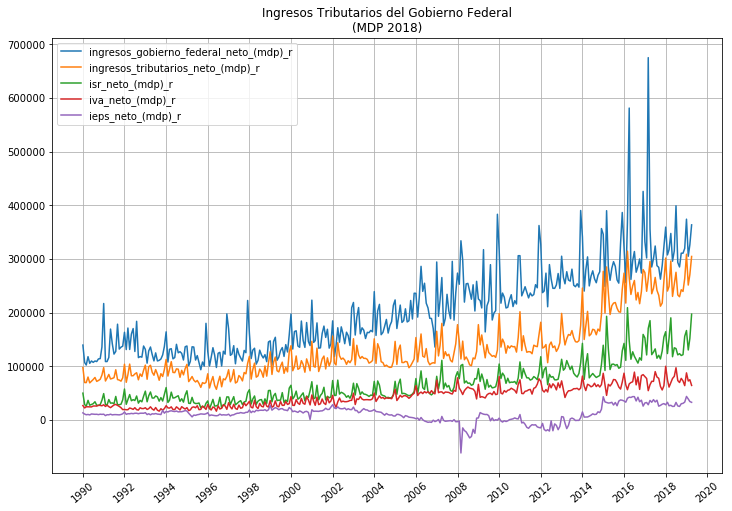

In [24]:
to_plot = ['ingresos_gobierno_federal_neto_(mdp)_r', 'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r',
           'iva_neto_(mdp)_r', 'ieps_neto_(mdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MDP 2018)', ticks = 'yearly', ticks_freq=2)

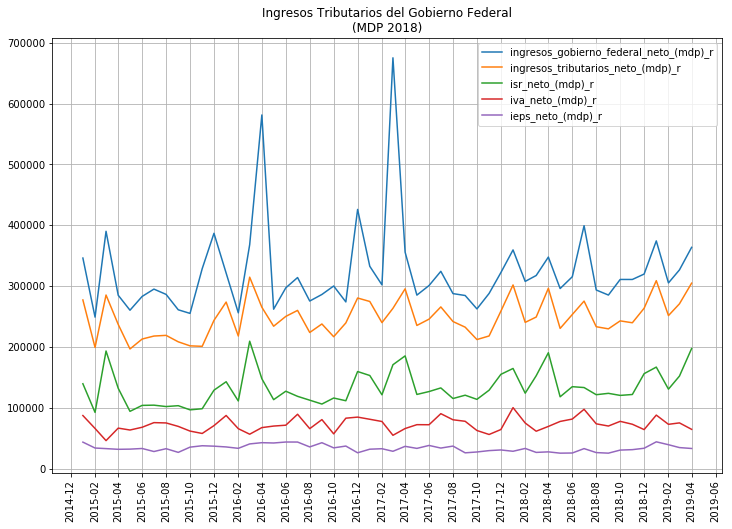

In [25]:
to_plot = ['ingresos_gobierno_federal_neto_(mdp)_r', 'ingresos_tributarios_neto_(mdp)_r', 'isr_neto_(mdp)_r',
           'iva_neto_(mdp)_r', 'ieps_neto_(mdp)_r']
descriptive.plot_series(fiscal_income_df, to_plot, 'Ingresos Tributarios del Gobierno Federal', 
                        '(MDP 2018)', ticks = 'monthly', ticks_freq=2, min_date='2015-01-01')

## Decomposition Naive

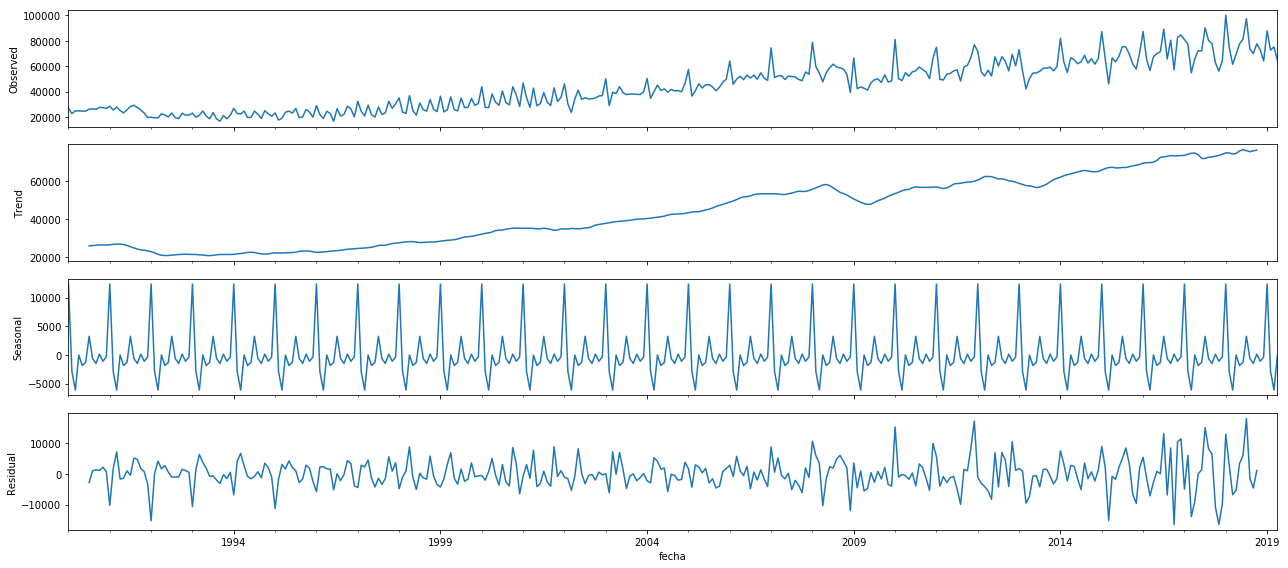

statsmodels.tsa.seasonal.DecomposeResult

In [26]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fiscal_income_df[params['outcome_col']], model='additive')
fig = decomposition.plot()
plt.show()
type(decomposition)

Se ve tendencia positiva en ingresos tributarios y estacionalidad. 

### Zoom a estacionalidad

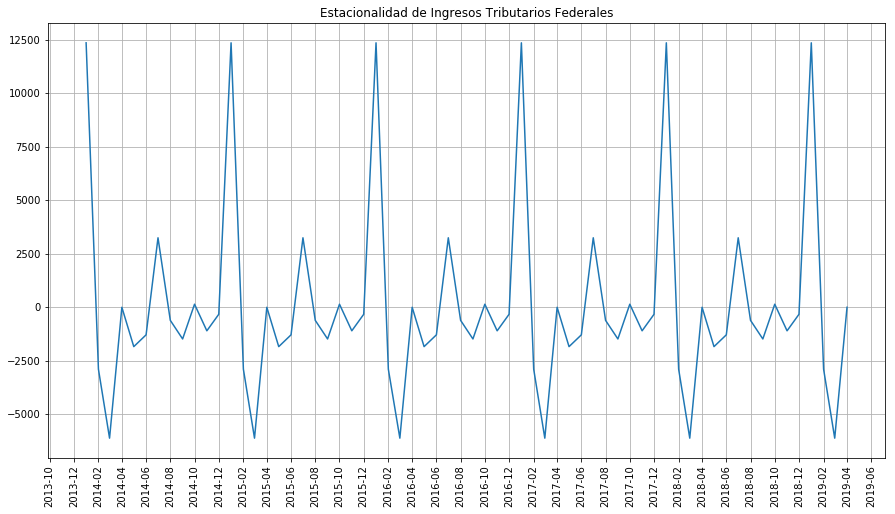

In [27]:
descriptive.plot_series(decomposition.seasonal, title='Estacionalidad de Ingresos Tributarios Federales',
                        figsize=(15, 8), legend=False, ticks = 'monthly',
                        ticks_freq= 2, min_date= '2014-01-01')

Se ve tendencia positiva de ingresos fiscales, así como fuerte componente estacional.Diciembre y Enero son los meses con mayores ingresos, Febrero siempre tiene una caida muy fuerte. Marzo es también de altos ingresos, y los demás meses se mantienen oscilando en niveles bajos y medios. 

## Hodrick Prescot

In [28]:
cycle, trend = sm.tsa.filters.hpfilter(fiscal_income_df[params['outcome_col']], 129600)
hp_decomp = fiscal_income_df[[params['outcome_col']]].copy()
hp_decomp["cycle"] = cycle
hp_decomp["trend"] = trend

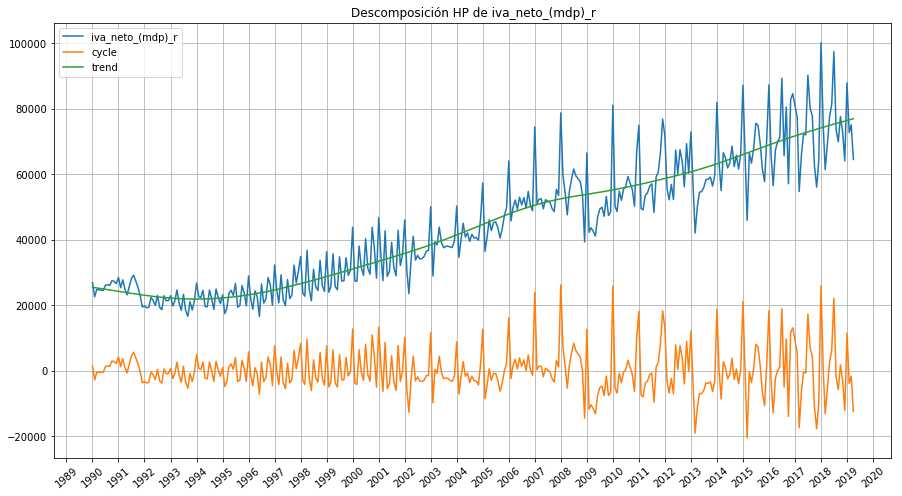

In [29]:
descriptive.plot_series(hp_decomp, title='Descomposición HP de {}'.format(params['outcome_col']),
                        figsize=(15, 8), ticks='yearly')

### Zoom a estacionalidad

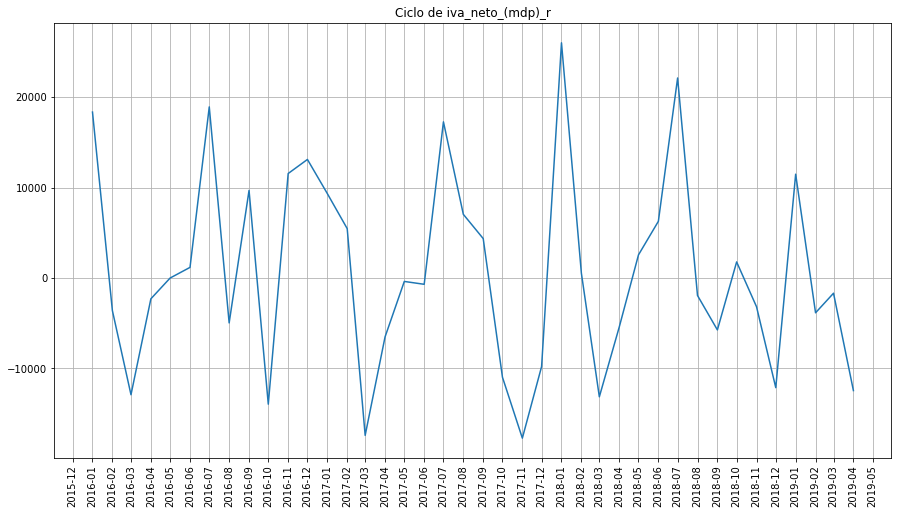

In [30]:
descriptive.plot_series(cycle, title='Ciclo de {}'.format(params['outcome_col']),
                        figsize=(15, 8), legend=False, ticks = 'monthly',
                        ticks_freq= 1, min_date= '2016-01-01')

## Testing for stationarity and transforming

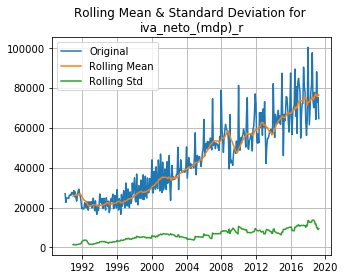

Results of Dickey-Fuller Test:
Test Statistic                   0.393532
p-value                          0.981251
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64


In [31]:
descriptive.test_stationarity(fiscal_income_df, params['outcome_col'])


 
 TRANSFORMATION log 



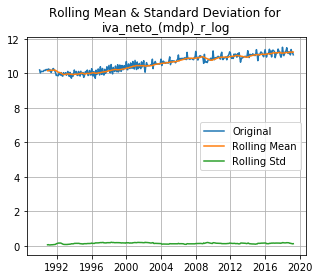

Results of Dickey-Fuller Test:
Test Statistic                  -0.091759
p-value                          0.950253
# Lags Used                     13.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)             -2.870129
Critical Value (10%)            -2.571346
dtype: float64

 
 TRANSFORMATION diff 



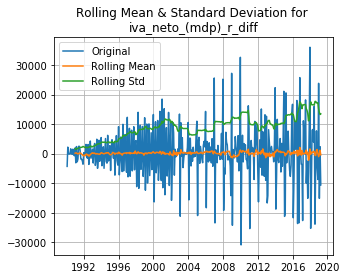

Results of Dickey-Fuller Test:
Test Statistic                -7.319596e+00
p-value                        1.203888e-10
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64

 
 TRANSFORMATION log_diff 



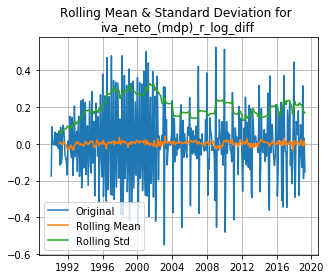

Results of Dickey-Fuller Test:
Test Statistic                -6.580338e+00
p-value                        7.542121e-09
# Lags Used                    1.200000e+01
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [32]:
transforms = ['log', 'diff', 'log_diff']
for t in transforms:
    print('\n \n TRANSFORMATION {} \n'.format(t))
    new_serie_name = params['outcome_col'] + '_' + t
    fiscal_income_df[new_serie_name] = descriptive.transformation(fiscal_income_df, params['outcome_col'], t)
    descriptive.test_stationarity(fiscal_income_df, new_serie_name)

## Stationarity results
- level: Not stationary
- log: Not stationary
- diff: Stationary
- log_diff: Stationary

Vamos a usar log diff para el análisis